In [1]:
# Implemented linear regression using normal, batch gradient, stochastic gradient

In [2]:
import numpy as np

In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
os.chdir('/Users/gopal/Downloads/bhargavi/HW2') 

# Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), 
and use Python to implement the following methods to find the coefficients: 

In [5]:
# Plotting the data2.txt data which dont have header
data = pd.read_csv('data2.txt', header= None)
data.columns = ['X', 'Y']
print(data)


          X         Y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


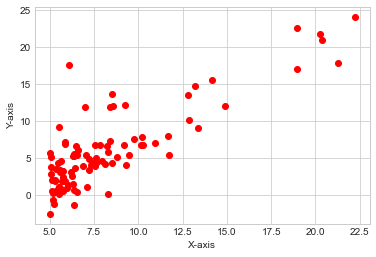

In [6]:
plt.style.use('seaborn-whitegrid')
plt.plot(data['X'],data['Y'],'ro')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Find the co-efficients using normal equation

In [7]:
# taking 1 vector with the size of input data to make the matrix multiplications possible
x = np.ones((len(data), 1))

In [8]:
x = np.append(x,data.loc[:, ['X']].to_numpy(), axis = 1)
y = data.loc[:, ['Y']].to_numpy()

In [9]:
#  formula to find  coefficients for siple linear regression  = inv(x_t * x) * x_t * y
x_t = np.transpose(x)
x_t_x = np.dot(x_t, x)
inv = np.linalg.inv(x_t_x)
coff1 = np.dot(inv, x_t) 
final_coefficients = np.dot(coff1, y)
print("Final Coefficients using Normal equation are: \n", final_coefficients)

Final Coefficients using Normal equation are: 
 [[-3.89578088]
 [ 1.19303364]]


# 3: Gradient Descent using batch AND stochastic modes respectively

# 3A-Split dataset into 80% for training and 20% for testing

In [10]:
from sklearn.model_selection import train_test_split

# train data size=80% and test data size=20%
train, test = train_test_split(data,random_state=None, test_size=0.2) # data would be shuffled for each run


In [11]:
print(train)

          X         Y
20   6.1891   3.13860
58   9.3102   3.96240
25  18.9450  22.63800
54   6.3328   1.42330
9    5.0546   3.81660
..      ...       ...
82   6.3557   0.67861
35   7.9334   4.56230
29  22.2030  24.14700
30   5.2524  -1.22000
3    7.0032  11.85400

[77 rows x 2 columns]


In [12]:
train_x_b = np.ones((len(train), 1))
train_x_b = np.append(train_x_b,train.loc[:, ['X']].to_numpy(), axis = 1)
train_x = train.loc[:, ['X']].to_numpy()
train_y = train.loc[:, ['Y']].to_numpy()

In [13]:
#print(train_x_b)

# BATCH GRADIENT DESCENT
Gradient will be calculated after passing all the input data



Updated weights using the batch gradient descent = 
[[0.03713272]
 [0.7940725 ]]


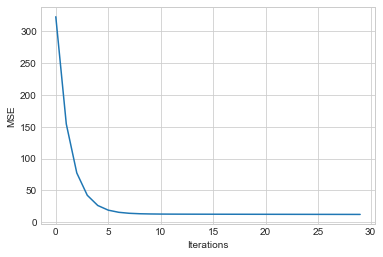

In [14]:
# Graph of MSE vs Iterations for the training dataset
# stopping criteria is after running 200 iterations
max_iterations = 30
lr = 0.01 # learning rate
m = len(train_x_b)

w = np.random.randn(2,1)

mse = np.zeros((max_iterations,1))

for i in range(max_iterations):
    #print(" ")
    #print(" Iteration",i)
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    #print("gradiant:",gradient)
    w = w - (lr * gradient)
    #print(" updated weight",w)
    mse[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    #print(mse[i][0])

    
print("Updated weights using the batch gradient descent = ")
print(w)

plt.plot(range(max_iterations), mse)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [15]:
test_x_b = np.ones((len(test), 1))
test_x_b = np.append(test_x_b,test.loc[:, ['X']].to_numpy(), axis = 1)
#test_y = test.loc[:, ['X']].to_numpy()
test_y = test.loc[:, ['Y']].to_numpy()

In [16]:
# MSE of testing data
pred_test = np.dot(test_x_b, w)
print(pred_test)



[[ 4.51625745]
 [ 4.69023873]
 [ 9.3341335 ]
 [ 5.09172178]
 [ 4.58653286]
 [ 7.32687705]
 [ 6.07454531]
 [16.13298222]
 [ 4.71564905]
 [ 5.14270124]
 [ 4.42652725]
 [ 4.404055  ]
 [ 4.15709846]
 [11.28437556]
 [ 6.46586424]
 [ 4.3087663 ]
 [ 6.69376305]
 [ 4.51546337]
 [ 6.55734139]
 [ 5.66956834]]


In [17]:
mse = np.sum(np.square(test_y - pred_test))/len(test_x_b)
mse

10.832152961613838

In [18]:
# r-squared of training data
from sklearn.metrics import r2_score
print("r-squared for Batch training set: ")
print(r2_score(train_y, pred))

r-squared for Batch training set: 
0.6061303855994639


In [19]:
# r-squared of testing data
print("r-squared for Batch testing set: ")
print(r2_score(test_y, pred_test))

r-squared for Batch testing set: 
0.6142043308743831


After 15 iteration MSE is nealry same

# STOCASTIC GRADIENT DESCENT 
gradient will be calculated and params will be updated for each input

# Stochastic gradiant descent using fixed Learning rate

weights w using the stocastic gradient descent = 
[[-3.74332879]
 [ 1.29475823]]


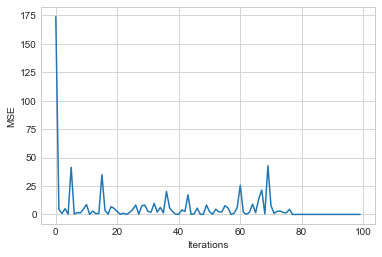

In [20]:
# Graph of MSE vs Iterations for the training dataset
max_iterations = 100
lr = 0.001 # learning rate

m = len(train_x_b)
w = np.random.randn(2,1)
mse = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse[i][0] = np.sum(np.square(xi.dot(w) - yi))

print("weights w using the stocastic gradient descent = ")
print(w)

plt.plot(range(max_iterations), mse)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [21]:
# MSE of testing data
print(w)
pred_test = np.dot(test_x_b, w)
mse = np.sum(np.square(test_y - pred_test))/len(test_x_b)
mse

[[-3.74332879]
 [ 1.29475823]]


8.489874318479748

# Findings

MSE for batch gradient descent test data:7.329425594687434
r-squared of Batch GD training set: 0.6351936055689211
r-squared of Batch GD testing set: 0.5619051662720667
    
MSE for stochastic gradient descent test data.865695979780961

Conclusion : for Batch gradiant MSE decreased till 3-4 iterations and then maintained nearly same values
    Where as for stocastic MSE fluctuated till some 75 ietrations and then maintained nearly same values 

# plot MSE of the testing set vs. learning rate

weights w using the batch gradient descent with learning rate 0.001 = 
[[0.27628636]
 [0.77031303]]
weights w using the batch gradient descent with learning rate 0.002 = 
[[-0.28778316]
 [ 0.82638771]]
weights w using the batch gradient descent with learning rate 0.003 = 
[[-0.99398854]
 [ 0.89659226]]
weights w using the batch gradient descent with learning rate 0.004 = 
[[-1.72500739]
 [ 0.96926354]]
weights w using the batch gradient descent with learning rate 0.005 = 
[[-2.38484552]
 [ 1.03485867]]
weights w using the batch gradient descent with learning rate 0.006 = 
[[-2.91664227]
 [ 1.08772509]]
weights w using the batch gradient descent with learning rate 0.007 = 
[[-3.30419949]
 [ 1.12625252]]
weights w using the batch gradient descent with learning rate 0.008 = 
[[-3.56152063]
 [ 1.15183306]]
weights w using the batch gradient descent with learning rate 0.009 = 
[[-3.71793184]
 [ 1.16738205]]
weights w using the batch gradient descent with learning rate 0.01 = 
[[-3.80525818]

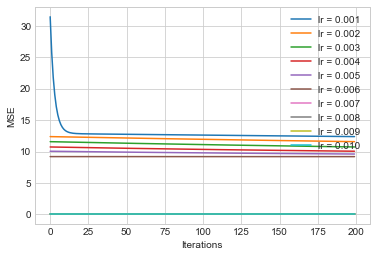

In [22]:
# Graph of MSE vs Iterations for the training dataset
max_iterations = 200
lr = 0.001 # learning rate
m = len(train_x_b)

w = np.random.randn(2,1)

mse1 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse1[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    

print("weights w using the batch gradient descent with learning rate 0.001 = ")
print(w)

lr = 0.002 # learning rate
mse2 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse2[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    

print("weights w using the batch gradient descent with learning rate 0.002 = ")
print(w)

lr = 0.003 # learning rate
mse3 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse3[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    

print("weights w using the batch gradient descent with learning rate 0.003 = ")
print(w)

lr = 0.004 # learning rate
mse4 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse4[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.004 = ")
print(w)

lr = 0.005 # learning rate
mse5 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse5[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.005 = ")
print(w)

lr = 0.006 # learning rate
mse6 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse6[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.006 = ")
print(w)

lr = 0.007 # learning rate
mse7 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse6[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
print("weights w using the batch gradient descent with learning rate 0.007 = ")
print(w)

lr = 0.008 # learning rate
mse8 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse6[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.008 = ")
print(w)

lr = 0.009 # learning rate
mse9 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse6[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.009 = ")
print(w)

lr = 0.01 # learning rate
mse10 = np.zeros((max_iterations,1))

for i in range(max_iterations):
    pred = np.dot(train_x_b, w)
    gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
    w = w - (lr * gradient)
    mse6[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
    
        
print("weights w using the batch gradient descent with learning rate 0.01 = ")
print(w)



plt.plot(range(max_iterations), mse1, label = "lr = 0.001")
plt.plot(range(max_iterations), mse2, label = "lr = 0.002")
plt.plot(range(max_iterations), mse3, label = "lr = 0.003")
plt.plot(range(max_iterations), mse4, label = "lr = 0.004")
plt.plot(range(max_iterations), mse5, label = "lr = 0.005")
plt.plot(range(max_iterations), mse6, label = "lr = 0.006")
plt.plot(range(max_iterations), mse7, label = "lr = 0.007")
plt.plot(range(max_iterations), mse8, label = "lr = 0.008")
plt.plot(range(max_iterations), mse9, label = "lr = 0.009")
plt.plot(range(max_iterations), mse10, label = "lr = 0.010")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [23]:
#Plot the cost function

Cost Function for LR  0.001 :  [10.58194269]
Cost Function for LR  0.002 :  [9.8082143]
Cost Function for LR  0.003 :  [9.53604333]
Cost Function for LR  0.004 :  [9.30472534]
Cost Function for LR  0.005 :  [9.20420642]
Cost Function for LR  0.006 :  [9.23705007]
Cost Function for LR  0.007 :  [9.21551696]
Cost Function for LR  0.008 :  [9.20316624]
Cost Function for LR  0.009 :  [9.18969255]
Cost Function for LR  0.01 :  [9.18935227]


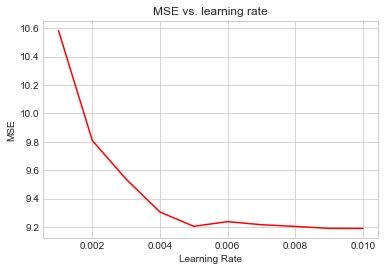

In [24]:
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,0.010]
mse_list = []
for i in lr_list:
    lr = i
    max_iterations = 1000
    m = len(train_x_b)
    w = np.random.randn(2,1)
    mse = np.zeros((max_iterations,1))
    for i in range(max_iterations):
        pred = np.dot(train_x_b, w)
        gradient = (2/len(train_x_b)) * np.dot(np.transpose(train_x_b),(pred - train_y))
        w = w - (lr * gradient)
        mse[i][0] = np.sum(np.square(train_y - pred))/len(train_x_b)
        if (i>0 and mse[i - 1][0] - mse[i][0] < 0.000001):
            break # termination criteria
    mse_list.append(mse[-1])
    print('Cost Function for LR ',lr,': ', mse[-1])
plt.plot(lr_list,mse_list,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs. learning rate')
plt.show()

In [25]:
# for stochastic gradient descent


weights w using the stocastic gradient descent for learning rate 0.001 = 
[[-3.55425893]
 [ 1.08206765]]
weights w using the stocastic gradient descent for learning rate 0.002 = 
[[-3.66565539]
 [ 1.08088601]]
weights w using the stocastic gradient descent for learning rate 0.003 = 
[[-3.71644706]
 [ 1.09232951]]
weights w using the stocastic gradient descent for learning rate 0.004 = 
[[-3.25504541]
 [ 1.50216431]]
weights w using the stocastic gradient descent for learning rate 0.005 = 
[[-3.68008564]
 [ 1.23219688]]
weights w using the stocastic gradient descent for learning rate 0.006 = 
[[-2.07407572]
 [ 1.01335826]]
weights w using the stocastic gradient descent for learning rate 0.007 = 
[[-5.45612206]
 [ 1.72727146]]
weights w using the stocastic gradient descent for learning rate 0.008 = 
[[-1.00548392]
 [ 0.28351699]]
weights w using the stocastic gradient descent for learning rate 0.009 = 
[[4.45643343]
 [6.48952684]]
weights w using the stocastic gradient descent for learni

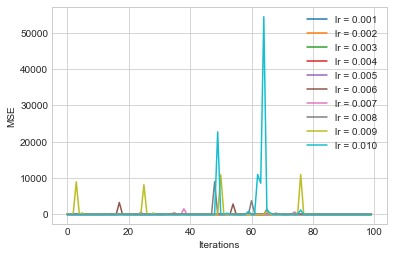

In [26]:
# Graph of MSE vs Iterations for the training dataset
max_iterations = 100
lr = 0.001 # learning rate

m = len(train_x_b)
w = np.random.randn(2,1)
mse1 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse1[i][0] = np.sum(np.square(xi.dot(w) - yi))

print("weights w using the stocastic gradient descent for learning rate 0.001 = ")
print(w)

lr = 0.002 # learning rate
w = np.random.randn(2,1)
mse2 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse2[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.002 = ")
print(w)    

lr = 0.003 # learning rate
w = np.random.randn(2,1)
mse3 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse3[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.003 = ")
print(w)    

lr = 0.004 # learning rate
w = np.random.randn(2,1)
mse4 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse4[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.004 = ")
print(w)

lr = 0.005 # learning rate
w = np.random.randn(2,1)
mse5 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse5[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.005 = ")
print(w)

lr = 0.006 # learning rate
w = np.random.randn(2,1)
mse6 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse6[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.006 = ")
print(w)

lr = 0.007 # learning rate
w = np.random.randn(2,1)
mse7 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse7[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.007 = ")
print(w)

lr = 0.008 # learning rate
w = np.random.randn(2,1)
mse8 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse8[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.008 = ")
print(w)

lr = 0.009 # learning rate
w = np.random.randn(2,1)
mse9 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse9[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.009 = ")
print(w)

lr = 0.010 # learning rate
w = np.random.randn(2,1)
mse10 = np.zeros((max_iterations,1))

for epoch in range(max_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = train_x_b[random_index:random_index+1]
        yi = train_y[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(w) - yi)
        w = w - (lr * gradient)
        mse10[i][0] = np.sum(np.square(xi.dot(w) - yi))
        
print("weights w using the stocastic gradient descent for learning rate 0.010 = ")
print(w)

plt.plot(range(max_iterations), mse1, label = "lr = 0.001")
plt.plot(range(max_iterations), mse2, label = "lr = 0.002")
plt.plot(range(max_iterations), mse3, label = "lr = 0.003")
plt.plot(range(max_iterations), mse4, label = "lr = 0.004")
plt.plot(range(max_iterations), mse5, label = "lr = 0.005")
plt.plot(range(max_iterations), mse6, label = "lr = 0.006")
plt.plot(range(max_iterations), mse7, label = "lr = 0.007")
plt.plot(range(max_iterations), mse8, label = "lr = 0.008")
plt.plot(range(max_iterations), mse9, label = "lr = 0.009")
plt.plot(range(max_iterations), mse10, label = "lr = 0.010")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.show()

Cost Function for LR  0.001 :  [0.00096016]
Cost Function for LR  0.002 :  [0.03734822]
Cost Function for LR  0.003 :  [18.74519578]
Cost Function for LR  0.004 :  [0.00539247]
Cost Function for LR  0.005 :  [3.39022775]
Cost Function for LR  0.006 :  [445.31599866]
Cost Function for LR  0.007 :  [0.41203581]
Cost Function for LR  0.008 :  [0.23687811]
Cost Function for LR  0.009 :  [0.17226736]
Cost Function for LR  0.01 :  [0.94181199]


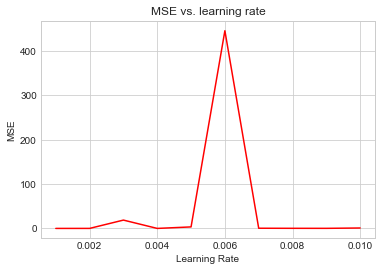

In [27]:
#lets plot cost function
#For Stocastic
lr_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,0.010]
mse_list = []
for i in lr_list:
    lr = i
    max_iterations = 100
    m = len(train_x_b)
    w = np.random.randn(2,1)
    mse = np.zeros((max_iterations,1))
    
    for epoch in range(max_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = train_x_b[random_index:random_index+1]
            yi = train_y[random_index:random_index+1]
            gradient = 2 * xi.T.dot(xi.dot(w) - yi)
            w = w - (lr * gradient)
            mse[i][0] = np.sum(np.square(xi.dot(w) - yi))

    mse_list.append(mse[1])
    print('Cost Function for LR ',lr,': ', mse[1])

plt.plot(lr_list,mse_list,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('MSE vs. learning rate')
plt.show()

 It is identified that in Batch gradient descent learning rate 0.006 is working better as the v=cost after this is maining nearly same values and also converging fastly


for Stochastic gradient at 0.005 MSE is not fluctuating where as for other learning rates, fluctuations can be seen in graph.

So the average good Learning rate would be nearly 0.005


And both of the methods methods require further study to exactly identify the behaviour.